# **DATA CLEANING PHASE**

<AxesSubplot:>

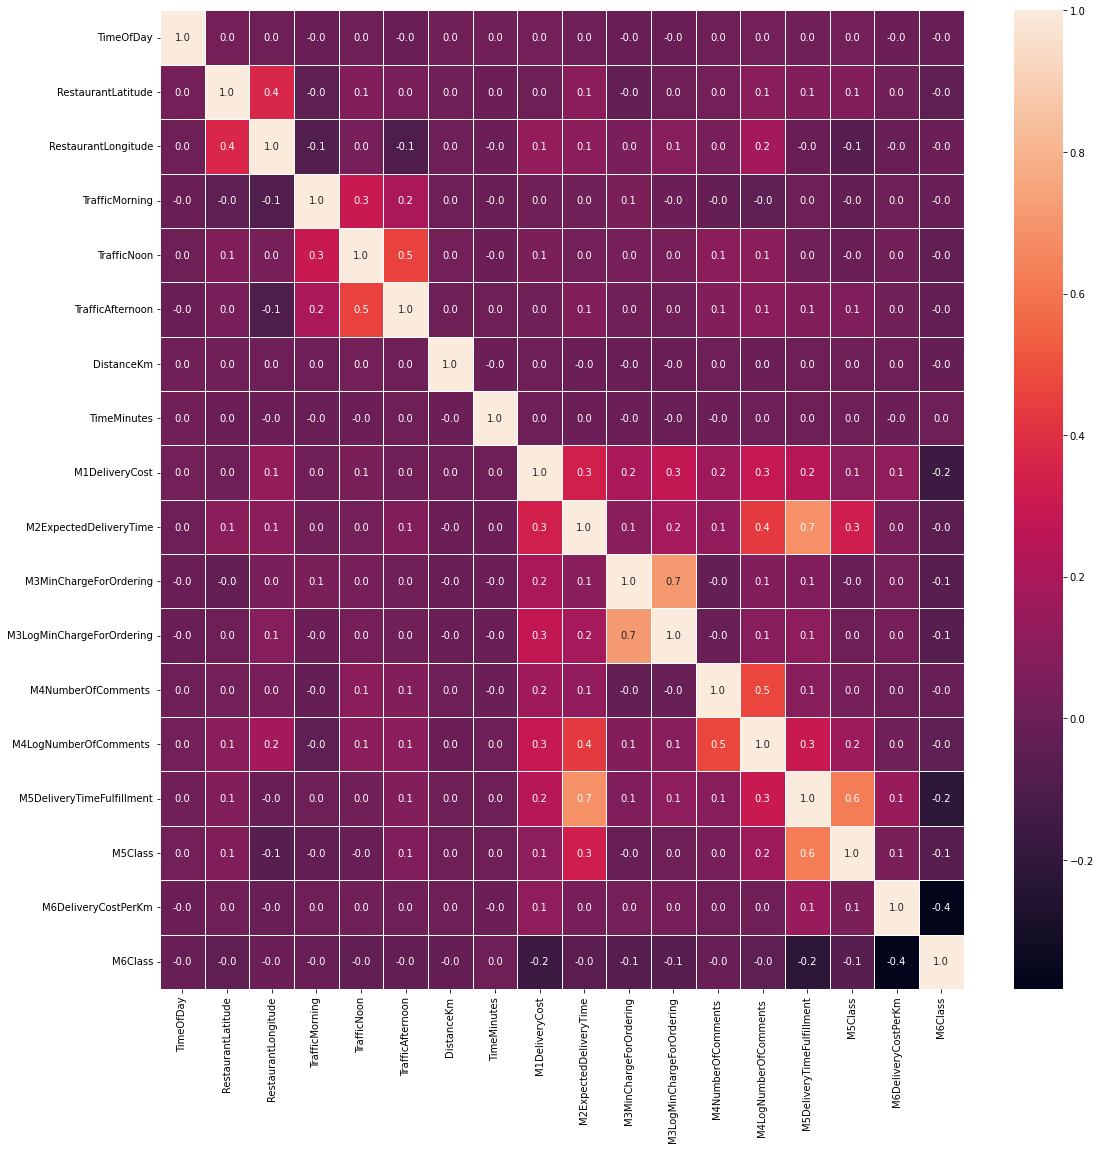

In [7]:
#Correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

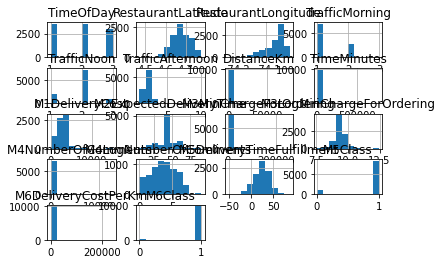

In [10]:
df.hist()
pyplot.show()

# **DATA INTEGRATION**

# **DATA TRANSFORMATION**

# **DATA REDUCTION**

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.136658,0.090725,-0.708127,0.225164,0.368831,-0.213655,0.025545,0.751172,-0.623966,0.240408,0.223883,-0.016209
1,0.624969,-0.272831,-1.518433,-0.605581,-0.493817,0.083859,-0.016969,0.519006,1.022119,0.663835,0.065321,-0.038372
2,-0.207469,-2.033064,1.346213,0.584163,-0.271591,0.290146,0.072529,-0.255098,0.126289,-0.689005,-0.133845,0.034715
3,0.013009,-1.208258,1.059888,0.659534,-0.343601,0.261950,0.231924,0.457032,-0.399908,0.165298,1.497879,-0.004896
4,1.368198,-0.396239,-0.484383,-1.329006,0.458688,-0.404968,-0.135069,0.443251,-0.512049,0.018552,0.174829,0.009882


<AxesSubplot:>

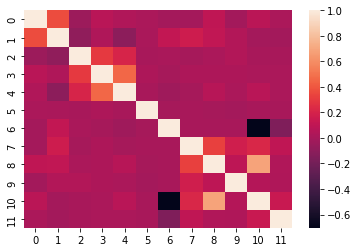

In [22]:
#Check the Co-relation between features without PCA
sns.heatmap(x.corr())

<AxesSubplot:>

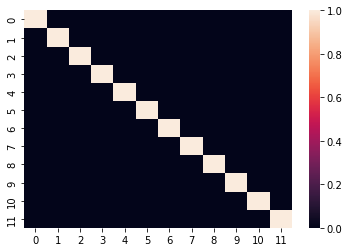

In [24]:

#Checking Co-relation between features after PCA
sns.heatmap(x_pca.corr())
#we have moved from higher dimensional feature space to a lower-dimensional feature space while 
#ensuring that there is no correlation between the so obtained PCs is minimum. 
#Hence, we have accomplished the objectives of PCA.

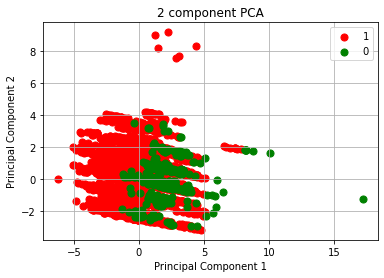

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
 indicesToKeep = x_pca['target'] == target
 ax.scatter(x_pca.loc[indicesToKeep, 'PC1']
 , x_pca.loc[indicesToKeep, 'PC2']
 , c = color
 , s = 50)
ax.legend(targets)
ax.grid()

**PREDICTION ON TRAINING SET**

# **DATA DISCRETIZATION**

Bin 0: 4.47049 -> 4.639484
Bin 1: 4.639484 -> 4.667078
Bin 2: 4.667078 -> 4.68677
Bin 3: 4.68677 -> 4.718457
Bin 4: 4.718457 -> 4.776851


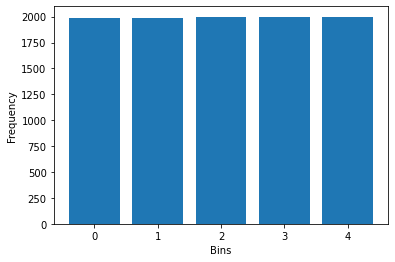

In [31]:

variables = ['RestaurantLatitude',
 'RestaurantLongitude',
 'TrafficMorning',
 'TrafficNoon',
 'TrafficAfternoon',
 'DistanceKm',
 'TimeMinutes',
 'M1DeliveryCost',
 'M2ExpectedDeliveryTime',
 'M3MinChargeForOrdering',
 'M5DeliveryTimeFulfillment',
 'M6DeliveryCostPerKm']

from collections import Counter
import matplotlib.pyplot as plt

def plot_bins(values):
    """visualizes the number of observations in each bin"""
    
    counter = Counter(values)
    plt.bar(counter.keys(), counter.values())
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.show() 

def show_bins(bins):
    """Shows the ranges of values the bins comprises"""
    
    for i in range(len(bins)-1):
        print(f'Bin {i}: {str(bins[i])} -> {str(bins[i+1])}')
        

from sklearn.preprocessing import KBinsDiscretizer

# create discretizer
kbins = KBinsDiscretizer(n_bins=5, strategy='quantile', encode='ordinal')
bin = kbins.fit_transform(np.array(df['RestaurantLatitude']).reshape(-1,1))

# show results
plot_bins(Counter(list(bin.flatten())))
show_bins(kbins.bin_edges_[0])

Bin 0: 0.012 -> 3.1
Bin 1: 3.1 -> 5.9
Bin 2: 5.9 -> 9.2
Bin 3: 9.2 -> 13.2
Bin 4: 13.2 -> 80000.0


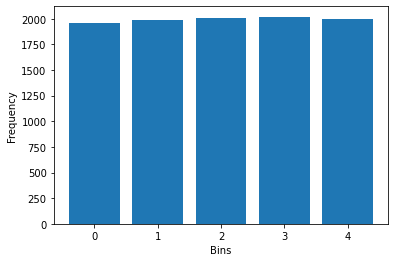

In [32]:
from sklearn.preprocessing import KBinsDiscretizer

# create discretizer
kbins = KBinsDiscretizer(n_bins=5, strategy='quantile', encode='ordinal')
bin = kbins.fit_transform(np.array(df['DistanceKm']).reshape(-1,1))

# show results
plot_bins(Counter(list(bin.flatten())))
show_bins(kbins.bin_edges_[0])

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:233: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.



Bin 0: 0.0 -> 2000.0
Bin 1: 2000.0 -> 3000.0
Bin 2: 3000.0 -> 15000.0


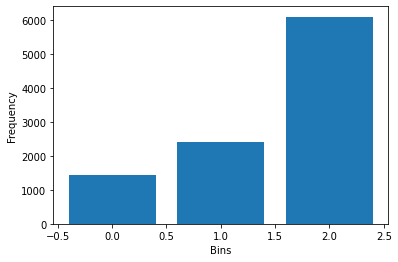

In [33]:

# create discretizer
kbins = KBinsDiscretizer(n_bins=5, strategy='quantile', encode='ordinal')
bin = kbins.fit_transform(np.array(df['M1DeliveryCost']).reshape(-1,1))

# show results
plot_bins(Counter(list(bin.flatten())))
show_bins(kbins.bin_edges_[0])

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:233: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:233: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:233: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:233: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 7 are removed. Consider decreasing the number of bins.

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:233: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in

Accuracy: 0.990 (0.002)


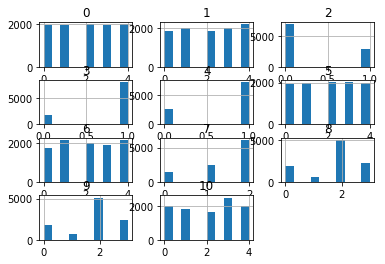

In [34]:
from pandas import DataFrame
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from numpy import mean
from numpy import std
columns =['RestaurantLatitude',
 'RestaurantLongitude',
 'TrafficMorning',
 'TrafficNoon',
 'TrafficAfternoon',
 'DistanceKm',
 'TimeMinutes',
 'M1DeliveryCost',
 'M2ExpectedDeliveryTime',
 'M3MinChargeForOrdering',
 'M5DeliveryTimeFulfillment']
# create discretizer
kbins = KBinsDiscretizer(n_bins=5, strategy='quantile', encode='ordinal')
bin = kbins.fit_transform(np.array(df[columns]))

dataset = DataFrame(bin)
# histograms of the variables
dataset.hist()
pyplot.show()
#We can see that the shape of the histograms generally matches the shape of the raw dataset

model = DecisionTreeRegressor()
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
n_scores = cross_val_score(model, df[columns], df['M6Class'], scoring='accuracy', cv=cv, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# **FEATURE ENGINEERING**

<AxesSubplot:>

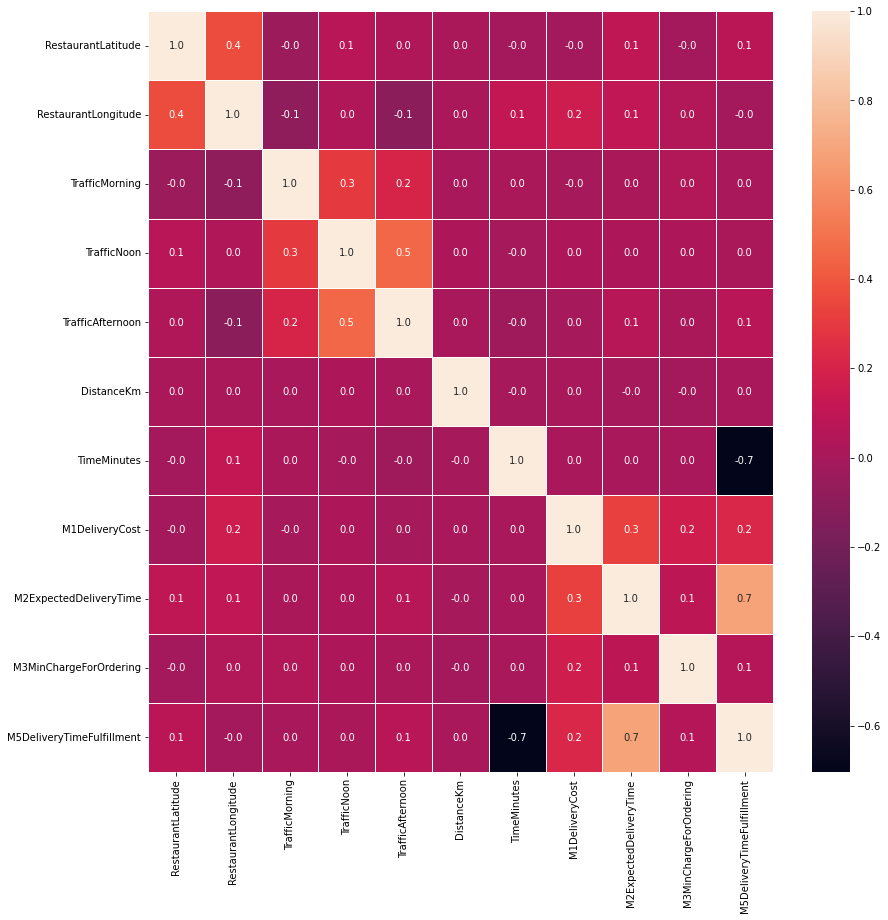

In [37]:
columns =['RestaurantLatitude',
 'RestaurantLongitude',
 'TrafficMorning',
 'TrafficNoon',
 'TrafficAfternoon',
 'DistanceKm',
 'TimeMinutes',
 'M1DeliveryCost',
 'M2ExpectedDeliveryTime',
 'M3MinChargeForOrdering',
 'M5DeliveryTimeFulfillment',]

 
#After dropping features, we will create a correlation matrix again as shown below:
#Correlation heatmap
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df[columns].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

**KNN Algorithms via Feature Extraction with ExtraTreesClassifier**

[0.03382266 0.03437398 0.01298264 0.01573564 0.01537436 0.24351444
 0.27501909 0.07050341 0.03335731 0.03063575 0.02969035 0.03210516
 0.04013805 0.13106512 0.00168203]


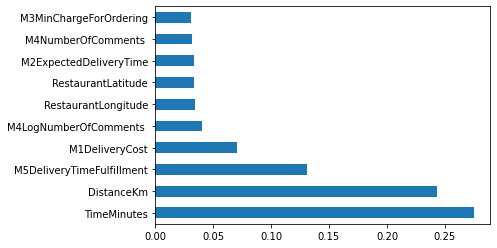

In [41]:
import pandas as pd
import numpy as np

X = df.iloc[:,2:17]  #independent columns
y = df.iloc[:,-1]    #target column 

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()